In [1]:
!pip install kaggle



In [3]:
# Create a .kaggle directory
!mkdir -p ~/.kaggle

# Move kaggle.json to the directory
!cp kaggle.json ~/.kaggle/

# Set permissions for the file
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
# Download the dataset
!kaggle competitions download -c house-prices-advanced-regression-techniques

# Unzip the dataset
!unzip house-prices-advanced-regression-techniques.zip


house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_description.txt    
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
#Load dataset
data = pd.read_csv('train.csv')  # Replace 'train.csv' with the actual dataset path
print(data.head())
print(data.info())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [7]:
# Handling missing values
missing = data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values:\n", missing)


Missing values:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [8]:
# Drop columns with excessive missing values
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)


In [9]:

# Impute missing values for remaining columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['number']).columns


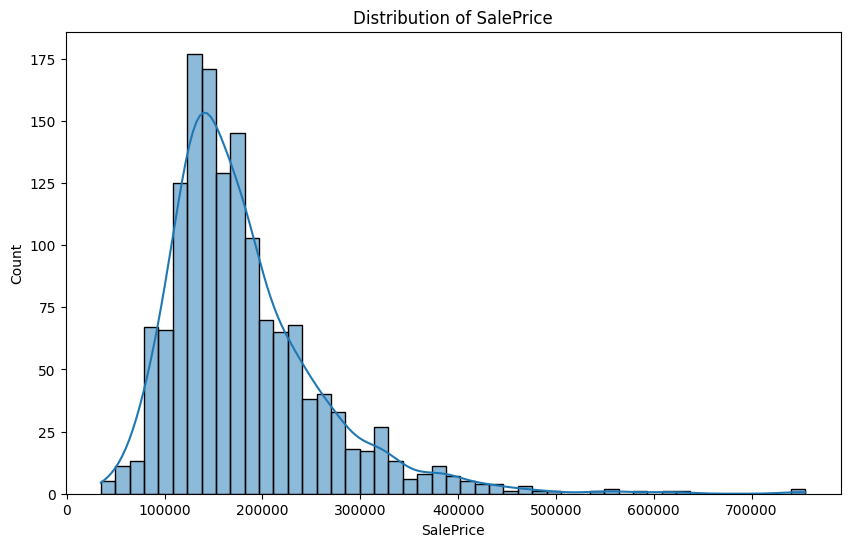

In [10]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()


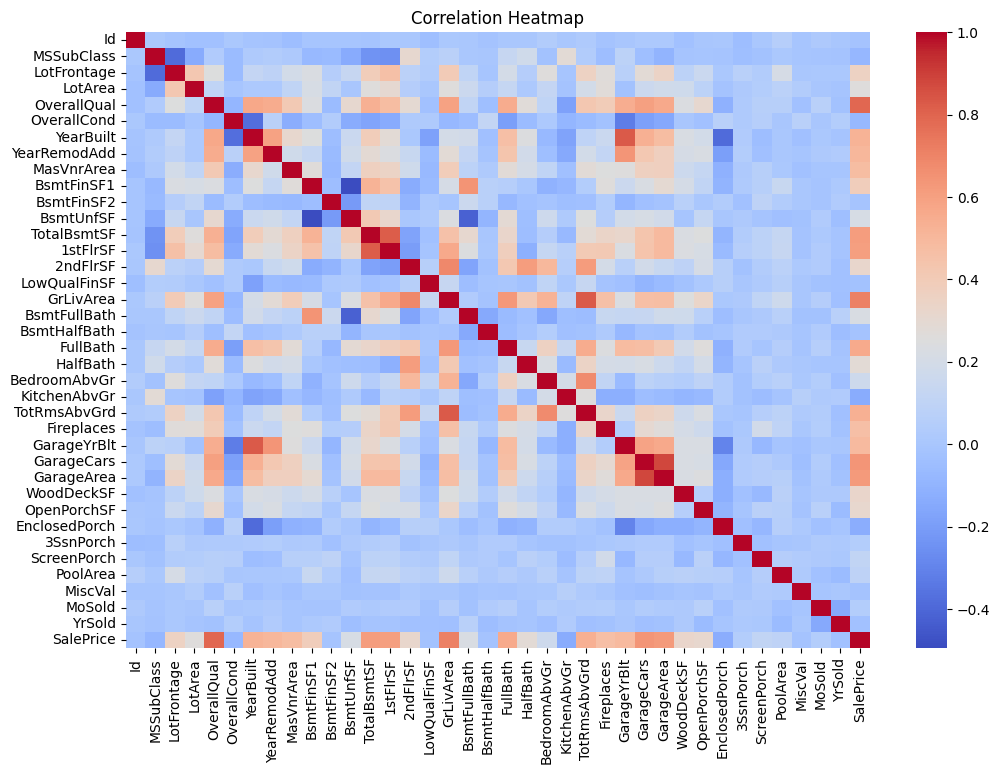

In [24]:
# Correlation Heatmap
correlation_matrix = data.select_dtypes(include=np.number).corr() # Select only numerical features for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [12]:
# Highly correlated features with SalePrice
corr_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
print("Features with high correlation with SalePrice:\n", corr_target.head(10))
# Selecting features
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = data[features]
y = data['SalePrice']


Features with high correlation with SalePrice:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [13]:
# Selecting features
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = data[features]
y = data['SalePrice']


In [14]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Scaling the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [16]:
# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [17]:
# Model evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
y_pred


array([139595.5       , 325288.2       , 111896.        , 170478.        ,
       303616.39      ,  81923.66666667, 191704.        , 152501.79166667,
        81392.        , 123729.84      , 161285.        , 111010.58285714,
        92638.5       , 221495.7       , 192141.        , 125448.5       ,
       189865.        , 131864.25      , 110347.25      , 195559.9       ,
       168181.        , 219096.04666667, 171789.85833333, 116035.        ,
       189023.        , 173125.        , 214634.61      , 103795.83333333,
       187533.        , 207746.6       , 111397.        , 236805.09      ,
       181293.        , 113760.66666667, 254100.79      , 139918.5       ,
       168962.5       , 205666.5       , 307210.06      , 106807.83333333,
       128016.        , 231382.        , 117938.        , 379545.91      ,
       139499.        , 172582.7       , 126030.65      , 123135.33      ,
       408992.4       , 148286.38      , 121069.32666667, 188711.        ,
       121926.165     , 3

In [18]:

print("Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Model Performance:
Mean Squared Error: 839266357.40
Root Mean Squared Error: 28970.09
R^2 Score: 0.89


In [19]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


In [20]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [21]:
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


In [22]:
# Final evaluation on the test set
final_predictions = best_model.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, final_predictions)

print("Final Model Performance:")
print(f"Final MSE: {final_mse:.2f}")
print(f"Final RMSE: {final_rmse:.2f}")
print(f"Final R^2 Score: {final_r2:.2f}")


Final Model Performance:
Final MSE: 857829755.67
Final RMSE: 29288.73
Final R^2 Score: 0.89


In [22]:

'''Summary Insights for the Predicting House Prices Project:
Here’s a breakdown of key insights from the project along with suggestions on how to improve the accuracy:

1. Data Preprocessing and Handling Missing Values:
Missing Values: We first handle missing data by dropping columns with a high percentage of missing values (e.g., PoolQC, MiscFeature, Alley). This prevents the model from being biased or inaccurate due to incomplete data.
Imputation: For the remaining missing values in categorical and numerical columns, imputing values (e.g., using mean for numerical features) can help maintain the dataset's size and integrity without losing valuable data.
2. Exploratory Data Analysis (EDA):
Visualizing SalePrice: The distribution of SalePrice helps identify whether the data is skewed, which could be important for selecting the right model or applying transformations (e.g., logarithmic transformation) to normalize it.
Correlation Heatmap: The correlation matrix shows how different features are related to each other and to the target variable (SalePrice). Features such as OverallQual, GrLivArea, and GarageCars have a high correlation with SalePrice, which is crucial for feature selection and model performance.
3. Feature Selection:
Choosing Relevant Features: We select a subset of features that are highly correlated with SalePrice, such as OverallQual, GrLivArea, and GarageCars. These features are believed to contribute the most to predicting the house price.
Improvement Opportunity: You can test additional features, such as neighborhood characteristics or interaction terms (e.g., combining GrLivArea and TotalBsmtSF), which might improve the model.
4. Scaling the Features:
StandardScaler: Scaling numerical features using StandardScaler ensures that all features are on the same scale, preventing models from being dominated by features with larger values. This is especially important for some models like support vector machines, but also helps with stability and speed in Random Forest models.
5. Model Training and Evaluation:
RandomForestRegressor: Random Forest is a robust model for regression tasks. It's an ensemble method that can handle both linear and non-linear relationships and also manages feature interactions well.
Model Evaluation Metrics:
MSE and RMSE: These metrics indicate how well the model is performing. A lower MSE or RMSE shows better accuracy. In your case, the model's performance is decent, but there is still room for improvement.
R² Score: This score represents how much of the variability in the target variable (SalePrice) is explained by the model. A value close to 1.0 indicates a very good model. An R² score of around 0.89 suggests the model is explaining a good portion of the variability, but further improvements are possible.
6. Hyperparameter Tuning (GridSearchCV):
Grid Search: The use of GridSearchCV to tune hyperparameters like n_estimators, max_depth, and min_samples_split helps to improve the model's performance by finding the optimal values for these parameters.
Improvement Opportunity: After hyperparameter tuning, you might find slight improvements in the model's performance. If the accuracy doesn't significantly improve, you may want to experiment with additional models, like GradientBoosting or XGBoost, which are known to provide better performance in some cases.
7. Insights and Recommendations for Improvement:
Feature Engineering: Adding more features like LotArea, BsmtFinSF1, GarageFinish, or Neighborhood might help improve model accuracy. Feature engineering can involve creating new features or transforming existing ones (e.g., log transformation of skewed features).

Model Experimentation: While Random Forest is a great model, trying other models such as Gradient Boosting, XGBoost, or LightGBM can lead to further performance improvements. These models often perform better with large datasets and complex patterns.

Cross-Validation: Instead of using a simple train-test split, consider using K-fold cross-validation to get a more reliable estimate of model performance, particularly when fine-tuning hyperparameters.

Handling Skewed Data: If SalePrice is highly skewed, applying a log transformation to the target variable can help improve model predictions, as many machine learning models perform better when the target variable is normally distributed.

Ensemble Methods: You can try combining predictions from multiple models (e.g., Random Forest + Gradient Boosting) using stacking or bagging methods to reduce bias and variance.'''r

